# Introduction to Machine Learning

Welcome to Jupyter Notebook! Jupyter Notebooks are a web-based computational environment for multiple programming languages, and very widely used for Python. It provides a great interface for testing, visualizing and sharing Python code.

Today, we will use Jupyter to introduce core machine learning concepts. No programming knowledge is required because you can simply run each cell.

Use __shift+enter__ to navigate through the notebook.

## Setup
First, we'll install the libraries used in this notebook.

<font color='red'>If you have not run this notebook before, remove the `#`  symbols in the following cell</font>

In [1]:
#!pip install ipywidgets
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install sklearn
#!pip install scikit-learn
#!pip install scikit-image
#!pip install tensorflow-cpu

Now, we can import the libraries that were just installed.

In [2]:
%matplotlib inline

import ipywidgets
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.svm

import skimage.io
import tensorflow as tf
from tensorflow import keras

# Background

Machine learning is a branch of __artificial intelligence (AI)__ that tries to __identify patterns__ in large amounts data by using various algorithms. The main idea is to __train models__ with data using learning algorithms. Once we have a trained model, we can use it to make __predictions on new data__. 

Most machine learning models _learn_ by following the same process. First a __prediction__ is made, then an __error function__ evaluates the prediction of the model, finally an __optimization__ process uses the error in the prediction to update the model.

In general, machine learning can be broken down into two categories:
1. Supervised Learning
    1. Labeled data
2. Unsupervised Learning
    1. Unlabeled data

Machine learning algorithms can be broken down even further into __neural network__ and __non-neural network__ algorithms.

## Notebook Outline
- __Data Science__
- __Supervised Learning__
- __Unsupervised Learning__
- __Neural Networks: Linear Layers__
- __Neural Networks: Convolutional Layers__

# Working with Data

One of the most important aspects of desinging any machine learning system is to __understand__ your data. You should __always try to visualize your data__ before you use it any type of algorithm.

## Generating Random Data
Let's begin by generating a random dataset of 2-D data points. 

In [5]:
# you can set a random seed to get "reproducible" randomness
np.random.seed(912)

# define a function to generate random data
def random_data(n_samples):
    """
    Generates random data in two dimensions.
    Returns a (n_samples, 2) numpy array.
    """
    # define the parameters (mean, covariance) of a normal distribution
    mean = [0.5, 0.5]
    cov = [[1,0], [0,100]]

    # generate n_samples of 2D data
    X = np.random.multivariate_normal(mean, cov, size=n_samples)

    return X 

Let's see what this data looks like. We'll start small and draw 50 samples from our function. 

In [7]:
X = random_data(50)
print('Dataset shape: (%d, %d)' % X.shape)
print(X)

Dataset shape: (50, 2)
[[  0.46119421 -15.34292879]
 [  0.1936361   -1.86561124]
 [  1.01307114  23.28107799]
 [  0.77845854  -1.91964289]
 [  0.57709928 -19.29975873]
 [  1.64854241 -10.78475393]
 [  0.68093787   2.59878976]
 [  0.76548839 -10.79213989]
 [  1.67485745  -3.49618009]
 [  0.48688207  -0.28111816]
 [  1.97964992 -10.29655918]
 [  0.62618336  13.75837102]
 [  1.06676573   0.8149726 ]
 [ -0.30578364  -4.3559289 ]
 [  0.51464007  -1.96308608]
 [ -0.810648   -16.8283321 ]
 [ -0.37558186  10.5876357 ]
 [ -0.28205505  -8.66746713]
 [ -1.2778692   -2.43628936]
 [ -1.71537868   4.59818481]
 [  0.65029862  15.08416071]
 [  1.53171206 -14.15707761]
 [ -1.27180156  13.6755119 ]
 [  0.32327349  -2.93432932]
 [ -1.06474013  -6.50017221]
 [ -0.67894786   5.33649186]
 [ -0.23621719  -1.91259852]
 [  1.55714551   8.36326944]
 [  1.07902213  -1.61263121]
 [  1.87434231   2.07830215]
 [ -0.21400464 -13.01947254]
 [  0.41803644  17.58678102]
 [  0.81855108  -5.91531814]
 [  0.17520799  -8.4

## Plotting Univariate Data
One of the most basic aspects of a dataset is its __dimensionality__. For example, if a dataset is 2-dimensional, it means that the dataset has two variables that are influencing the outcomes. These dimensions are also called the __features__ of a dataset. In this case, `X` is our dataset, and it has two features (we'll call them "X_1" and "X_2"). Let's plot each of these features individually using `matplotlib`:

In [8]:
# generate 1000 random samples
X = random_data(1000)

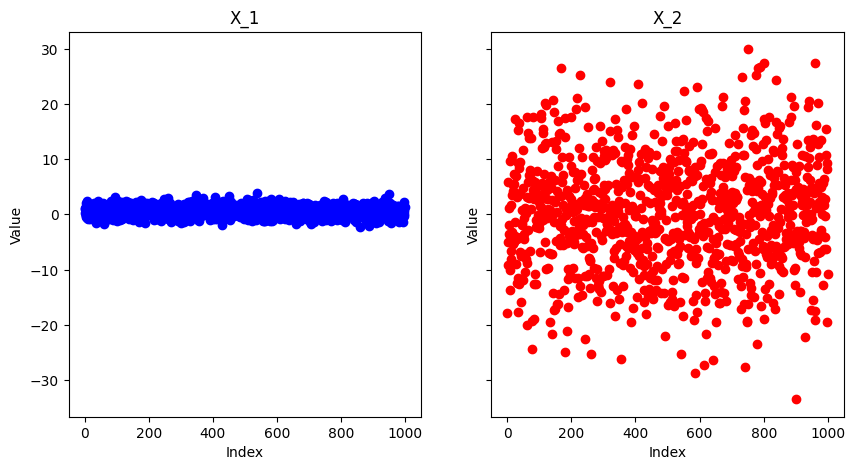

In [9]:
# generate indices for X
idx = range(len(X))

# initialize a 2x1 figure for plotting
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# plot X_1 on the left
ax1.scatter(idx, X[:, 0], c='b')
ax1.set_title('X_1')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')

# plot X_2 on the right
ax2.scatter(idx, X[:, 1], c='r')
ax2.set_title('X_2')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')

# display the plot
plt.show()

Since we only have one feature, a better way to visualize this is to look at the data's frequency by using a __histogram__ this will shows us the featues distribution.

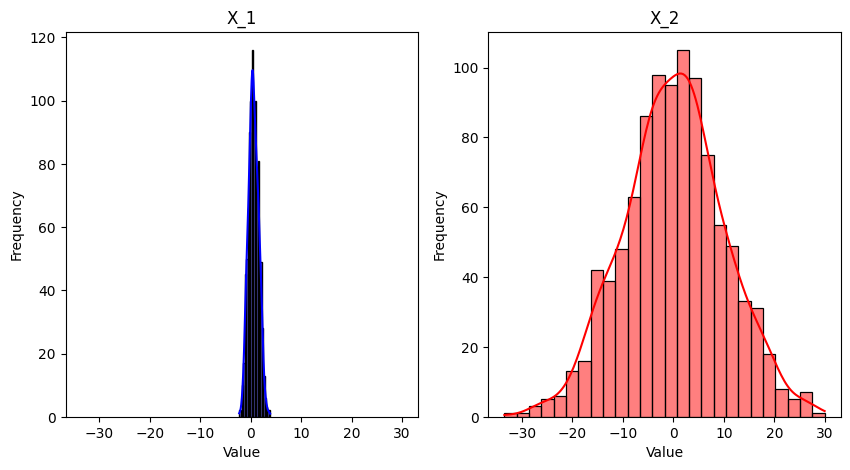

In [11]:
# initialize a 2x1 figure for plotting
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# plot histogram of X_1 on the left
sns.histplot(X[:, 0], kde=True, color='b', ax=ax1)
ax1.set_title('X_1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# plot histogram of X_2 on the right
sns.histplot(X[:, 1], kde=True, color='r', ax=ax2)
ax2.set_title('X_2')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

# display the plot
plt.show()

## Mulivariate Data
So far we've visualized _univariate_ (1-dimensional) data, but now let's visualize the entire dataset.

In [12]:
# generate a 2-D dataset
X = random_data(10000)

# create a pandas dataframe with the data and column names
df = pd.DataFrame(X, columns=['X_1', 'X_2'])

# show the dataframe
df

,X_1,X_2
0,0.901303,-10.479600
1,0.629826,15.789303
2,2.441919,8.334067
3,0.440731,10.351153
4,1.095130,-3.114085
...,...,...
9995,2.006849,-8.394862
9996,0.810932,8.301096
9997,1.174933,-13.381352
9998,-0.441818,-12.475551


## The Iris Dataset
Now that we've seen some basic ways to plot randomly generate data, let's look at a real dataset. The Iris Dataset has __labels__ associated with it, so each sample is labeled according to its species of flower. Since each sample, or row, is labeled we can take advatange of supervised learning . 

In [13]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# show dataset shape
print('Iris data: (%d, %d)' % iris.data.shape)
print('Iris targets: (%d,)' % iris.target.shape)

# show feature names
print('Feature names: ', iris.feature_names)

# show label names
print('Label names: ', iris.target_names)

Iris data: (150, 4)
Iris targets: (150,)
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label names:  ['setosa' 'versicolor' 'virginica']


Each sample in the dataset is described by four features, and each sample is given a one of three labels. Let's visualize two features of the dataset. 

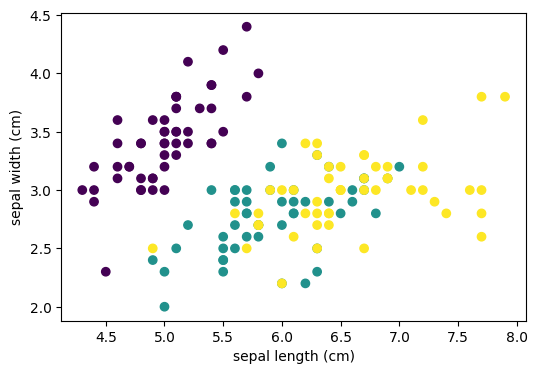

In [14]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# plot the first two features
x = iris.data[:, 0]
y = iris.data[:, 1]

plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

The color of each data point is the label of that sample, so which flower spieces the flower is.

# Supervised Learning
Now that we know some ways to __understand our data__, we can begin to __understand our task__. What are we trying to accomplish with our data? Many machine learning tasks are either __classification__ or __regression__ problems (discrete vs continuous)

#### Classification example
Predicting an email into one of two __categories__: normal or spam.

<img src="https://vitalflux.com/wp-content/uploads/2021/09/Spam-email-classification-using-machine-learning-algorithms.jpg" width="500"/>


#### Regression example
Predicting the future __price__ of stock.

<img src="https://1.bp.blogspot.com/--DzBhWC669E/YAajdaDc7iI/AAAAAAAAAIQ/_Uu0OtKiMsAhgtRqPuBYtT_YCT6UwxpcQCNcBGAsYHQ/s3196/Why%2Bdo%2BStock%2Bprices%2Bchange%2Bevery%2Bsecond.jpg" width="600"/>

Now, let's look at a using some supervised learning models to try to predict the species of flowers in the Iris dataset. This is an example of __labeled data__.

In [16]:
# load the Iris dataset from seaborn, which provides the dataset as a pandas dataframe
iris = sns.load_dataset('iris')

# display the dataframe
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Logisitc Regression
One of the most basic classification algorithms is __logistic regression__. Logistic regression tries to draw straight lines  between the three different classes in our dataset. Even though it has regression in the name, it's actually a misnomer because it used for classification.

This algorithm has two distinct phases:

1. __Training__: In this phase we repeatedly show our model each sample (with it's label) from the training set, adjusting the model each time to make correct predictions.

2. __Prediction__: Once we have shown our model enough samples, we ask it to classify the samples from our test set, __which the model has not seen__. By measuring the percentage of samples that are predicted correctly, we can tell how well the model has learned the task.

First, we'll split the data into a train and test.

In [17]:
# load the Iris dataset from sklearn
iris = sklearn.datasets.load_iris()

# extract Iris data and labels
X = iris.data
y = iris.target

# split the Iris dataset into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

# print shapes of train set and test set
print('X_train shape: (%d, %d)' % X_train.shape)
print('y_train shape: (%d,)' % y_train.shape)
print('X_test shape: (%d, %d)' % X_test.shape)
print('y_test shape: (%d,)' % y_test.shape)

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


Now we'll train out model using the train set, and predict the flowers labels using the test set.

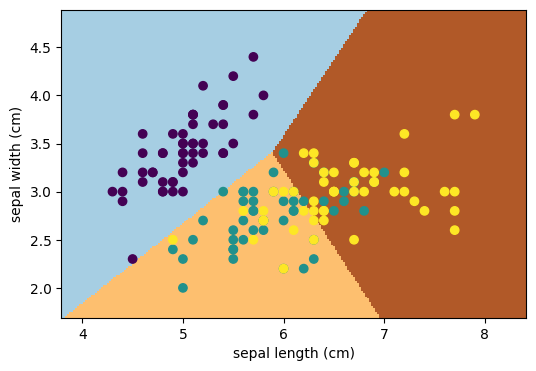

In [18]:
# create a logistic regressor
clf = sklearn.linear_model.LogisticRegression()

# "fit" the logistic regressor to the training set (phase 1)
# we use only the first two features for visualization purposes
clf.fit(X_train[:, [0, 1]], y_train) 

# create a grid of the 2D space in which our training data resides
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
step_size = 0.02

xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# use the logistic regressor to classify the entire grid
# c_ concatenates two arrays, and ravel converts a 2-d (or n-d) array to 1-d array
preds = clf.predict(np.c_[xx.ravel(), yy.ravel()])
preds = preds.reshape(xx.shape) 

# plot the grid of predictions
plt.figure(figsize=(6, 4))
plt.pcolormesh(xx, yy, preds, cmap=plt.cm.Paired, shading='auto')

# plot the Iris dataset
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

The above plot shows a good visual of how logistic regression approaches the classification task. The color of the data point is its __true classification__ result, and the background color __predicted classification__ from our model.

# Unsupervised Learning
What if our data does not have labels? Algorithms that work with unlabeled data are called __unsupervised learning__ algorithms. These algorithms try to learn something about the structure of the data. The two main tasks which can accomplish this are __clustering__ and __dimensionality reduction__.

### K-Means Clustering
One of the most common clustering is k-means clustering, because it is fast and relatively easy to understand.

The goal of k-means clustering is to group the data points into a specific number of clusters. The user defines the number of clusters k-means should look for, that is the `k` value.

Here's an example form Wikipedia of k-means in action:
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="kmeans" width="300" height="300"/>
</center>

Let's look at an example by clustering an image into different number of clusters.

In [19]:
import urllib
# Download the ladybug image
images_path = os.path.join("images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/bradford415/cuhackit-workshop/main/images/ladybug.png"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images\\ladybug.png', <http.client.HTTPMessage at 0x29c27b9c640>)

In [26]:
from  matplotlib.image import imread
import sklearn.cluster
image = imread(os.path.join("images", "ladybug.png"))
image.shape

(533, 800, 3)

In [27]:
X = image.reshape(-1, 3)
print(X.shape)

(426400, 3)


In [28]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

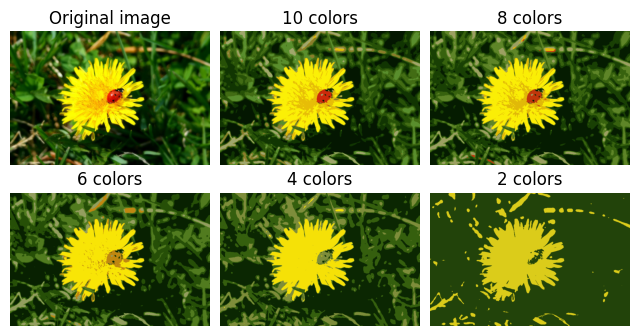

In [29]:
plt.figure(figsize=(8,4))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

What does this mean? We have specificied 5 different number of clusters and ran the algorithm 5 times. Each __cluster represents a color__ that represents the image. The color values are obtained by returning the clusters' centers.

# Neural Networks: Dense Layers
Up until now, we've only covered machine learning algorithms that do not use neural networks. Neural networks are a series of layers containing connections and neurons. The goal is to learn the weights of a neural network through a training process. Once we have a trained neural network with weights, we can use it to make predictions on new data.

One of the most basic types of neural networks is the __multilayer perceptron__, which is composed of only fully connected layers. This architecture is descrived in the figure below. 

<center>
<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="neural-net" width="500"/>
</center>

To explore the multilayer perceptron, let's use a differnt dataset called __MNIST__. The MNIST dataset contains 70,000 images of hand written digits, each image is labeled as a digit between 0-9.

In [30]:

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print('X_train: %s' % str(X_train.shape))
print('y_train: %s' % str(y_train.shape))
print('X_test: %s' % str(X_test.shape))
print('y_test: %s' % str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


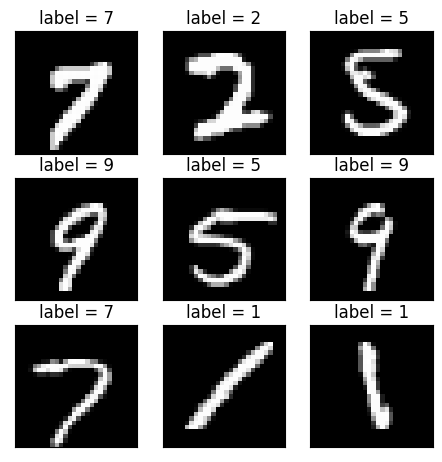

In [31]:
# define the size of the grid
rows = 3
cols = 3

# select several samples from MNIST at random
indices = np.random.choice(np.arange(len(X_train)), rows * cols)

# plot the images in a grid
plt.figure(figsize=(1.8 * cols, 1.8 * rows))

for i in range(rows * cols):
    index = indices[i]
    
    ax = plt.subplot(rows, cols, i + 1)
    plt.imshow(X_train[index], cmap='gray')
    plt.title('label = %d' % y_train[index])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

The above figure shows some example images from the MNIST dataset.

Now, here's an example of how we would be the build a multilayer perceptron in Tensorflow and Keras.

In [32]:
# create a 3-layer neural network
x_input = keras.Input(shape=(28, 28,))
x = keras.layers.Flatten()(x_input)
x = keras.layers.Dense(units=512, activation='sigmoid')(x)
x = keras.layers.Dense(units=512, activation='sigmoid')(x)
y = keras.layers.Dense(units=10, activation='softmax')(x)

mlp = keras.models.Model(x_input, y)

As you can see, it's very easy to define a basic neural networks in Tensorflow. There are a few more things we need beforfe we can compile our model: the __loss function__, the __optimizer__, and the __metrics__. We won't go into too much detail, so the main point is that the loss function and optimizer allows the neural network to learn. The metrics are just a way of evaluating how well our neural network model performed.

In [33]:
# compile the model
mlp.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# print a summary of the model
mlp.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Finally,  we can train our model on the MNIST train set. 

In [34]:
# normalize the data
X_norm_train = X_train.astype('float32') / 255.
X_norm_test = X_test.astype('float32') / 255.

# convert the training and test labels into one-hot labels
y_cate_train = keras.utils.to_categorical(y_train, num_classes=10)
y_cate_test  = keras.utils.to_categorical(y_test , num_classes=10)

# train the model
history = mlp.fit(x=X_norm_train, y=y_cate_train, batch_size=500, epochs=50, validation_split=0.1)

Epoch 1/50
108/108 [==============================] - 2s 17ms/step - loss: 2.3093 - accuracy: 0.1261 - val_loss: 2.2870 - val_accuracy: 0.1135
Epoch 2/50
108/108 [==============================] - 2s 14ms/step - loss: 2.2786 - accuracy: 0.1566 - val_loss: 2.2689 - val_accuracy: 0.1100
Epoch 3/50
108/108 [==============================] - 2s 14ms/step - loss: 2.2615 - accuracy: 0.1966 - val_loss: 2.2506 - val_accuracy: 0.2350
Epoch 4/50
108/108 [==============================] - 2s 14ms/step - loss: 2.2437 - accuracy: 0.2626 - val_loss: 2.2325 - val_accuracy: 0.2702
Epoch 5/50
108/108 [==============================] - 2s 14ms/step - loss: 2.2255 - accuracy: 0.3358 - val_loss: 2.2135 - val_accuracy: 0.2978
Epoch 6/50
108/108 [==============================] - 2s 14ms/step - loss: 2.2064 - accuracy: 0.3883 - val_loss: 2.1925 - val_accuracy: 0.4657
Epoch 7/50
108/108 [==============================] - 2s 14ms/step - loss: 2.1862 - accuracy: 0.4526 - val_loss: 2.1714 - val_accuracy: 0.4208

Congratulations, you just trained your first neural network. 

Now we can visualize how well our model learned the data compared to the test set. What we really want to know is did our model learn to classify the digits of the MNIST dataset?

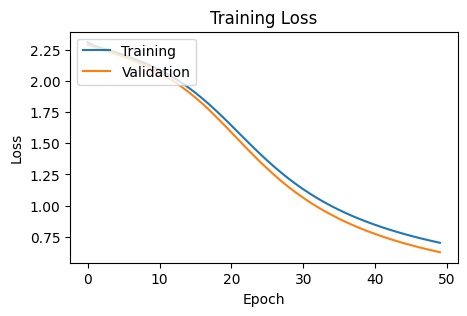

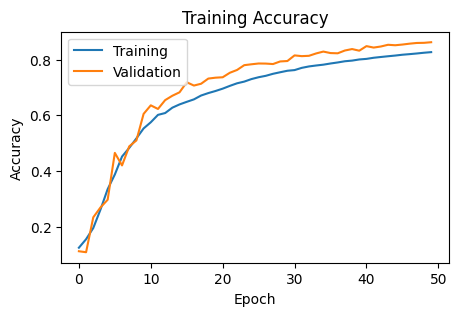

In [35]:
plt.figure(figsize=(5, 3))
# plot the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(5, 3))
# plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Finally, we can use our test set to make predictions on our trained model

In [36]:
# evaluate the model on the test set
scores = mlp.evaluate(x=X_norm_test, y=y_cate_test) 

# print results
for name, score in zip(mlp.metrics_names, scores):
    print('%s: %g' % (name, score))

313/313 [==============================] - 1s 3ms/step - loss: 0.6723 - accuracy: 0.8375
loss: 0.672272
accuracy: 0.8375


Great! Our model predicted about 80% of our test samples correctly. This is a lot better than if we randomly guessed. We can summarize this prediction with a table called a confusion matrix.

313/313 [==============================] - 1s 3ms/step


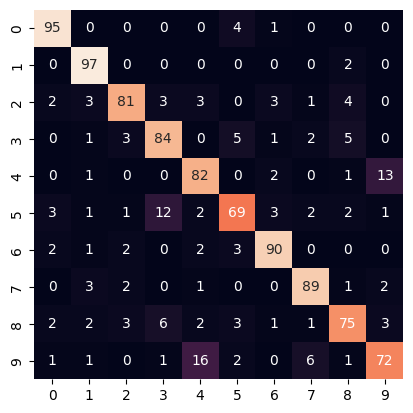

In [38]:
# get the raw predictions of the network on the test set
y_cate_pred = mlp.predict(X_norm_test)

# convert the one-hot encoded output to class indexes
y_pred = np.argmax(y_cate_pred, axis=1)

# TODO: create a confusion matrix from the class predictions (refer to supervised learning notebook)
classes = [str(i) for i in range(10)]
confusion_matrix_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, y_pred))
# normalize the confusion matrix
confusion_matrix_norm = confusion_matrix_df/confusion_matrix_df.sum(axis=1)
confusion_matrix_norm = np.around(confusion_matrix_norm,2) * 100
sns_heatmap=sns.heatmap(confusion_matrix_norm, annot=True, cbar=False,
                                      square=True, xticklabels=classes, yticklabels=classes)
# The confusion matrix has been normalized and multiplied by 100 so these numbers represent a percentage